In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.8 MB/s eta 0:00:00


In [2]:
import shap
import numpy as np
import pandas as pd
import scipy.stats
import sklearn
import xgboost
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# This cell defines the functions we use to generate the data in our scenario
class FixableDataFrame(pd.DataFrame):
    """ Helper class for manipulating generative models.
    """
    def __init__(self, *args, fixed={}, **kwargs):
        self.__dict__["__fixed_var_dictionary"] = fixed
        super(FixableDataFrame, self).__init__(*args, **kwargs)
    def __setitem__(self, key, value):
        out = super(FixableDataFrame, self).__setitem__(key, value)
        if isinstance(key, str) and key in self.__dict__["__fixed_var_dictionary"]:
            out = super(FixableDataFrame, self).__setitem__(key, self.__dict__["__fixed_var_dictionary"][key])
        return out

In [5]:
def generator1(n, fixed={}, seed=0):
    """The generative model for our subscriber retention example."""
    if seed is not None:
        np.random.seed(seed)
    X = FixableDataFrame(fixed=fixed)


    X["extrainforamtion"] = np.random.uniform(0, 2, size=(n,)) + np.random.normal(0,0.1, size=(n,))

    # the number of sales calls made to this customer
    X["feature1"] = X["extrainforamtion"]
    X["feature2"] = X["extrainforamtion"]
    # X["feature1"] = X["extrainforamtion"]
    # X["feature2"] = X["extrainforamtion"]

    X["feature3"] = X['feature1']*10 + X["feature2"]*20 + np.random.normal(0,0.1, size=(n,))
    return X

In [4]:
def generator2(n, fixed={}, seed=0):
    """The generative model for our subscriber retention example."""
    if seed is not None:
        np.random.seed(seed)
    X = FixableDataFrame(fixed=fixed)


    X["extrainforamtion"] = np.random.uniform(0, 2, size=(n,)) + np.random.normal(0,0.1, size=(n,))

    # the number of sales calls made to this customer
    X["feature1"] = X["extrainforamtion"] + np.random.normal(0,0.005, size=(n,))
    X["feature2"] = X["extrainforamtion"] + np.random.normal(0,0.005, size=(n,))
    # X["feature1"] = X["extrainforamtion"]
    # X["feature2"] = X["extrainforamtion"]

    X["feature3"] = X['feature1']*10 + X["feature2"]*20 + np.random.normal(0,0.1, size=(n,))
    return X

In [6]:
def generator3(n, fixed={}, seed=0):
    """The generative model for our subscriber retention example."""
    if seed is not None:
        np.random.seed(seed)
    X = FixableDataFrame(fixed=fixed)


    X["extrainforamtion"] = np.random.uniform(0, 2, size=(n,)) + np.random.normal(0,0.1, size=(n,))

    # the number of sales calls made to this customer
    X["feature1"] = X["extrainforamtion"] + np.random.normal(0,0.01, size=(n,))
    X["feature2"] = X["extrainforamtion"] + np.random.normal(0,0.01, size=(n,))
    # X["feature1"] = X["extrainforamtion"]
    # X["feature2"] = X["extrainforamtion"]

    X["feature3"] = X['feature1']*10 + X["feature2"]*20 + np.random.normal(0,0.1, size=(n,))
    return X

In [7]:
def toy_dataset(gen):
    """The observed data for model training."""
    n = 10000
    X_full = gen(n)
    y = X_full["feature3"]
    X = X_full.drop(["feature3"], axis=1)
    return X, y

In [8]:
X1,y1 = toy_dataset(generator1)
X2,y2 = toy_dataset(generator2)
X3,y3 = toy_dataset(generator3)

In [9]:
X1,y1 = toy_dataset(generator1)
model1 = sklearn.linear_model.LinearRegression()
model1.fit(X1,y1)
accs1= []
shaps1_1 = []
shaps1_2 = []
for i in range(100):
  model1.coef_[0] += 0.1
  model1.coef_[1] -= 0.1
  y_pred = model1.predict(X1)
  acc = np.mean(1- np.abs(y1-y_pred))
  accs1.append(acc)
  explainer = shap.Explainer(model1.predict,shap.utils.sample(X1, 100))
  shap_val = explainer(shap.utils.sample(X1, 100))
  shaps1_1.append(np.average(np.abs(shap_val.values[:,0])))
  shaps1_2.append(np.average(np.abs(shap_val.values[:,1])))

In [10]:
X2,y2 = toy_dataset(generator2)
model2 = sklearn.linear_model.LinearRegression()
model2.fit(X2,y2)
accs2= []
shaps2_1 = []
shaps2_2 = []
for i in range(100):
  model2.coef_[0] += 0.1
  model2.coef_[1] -= 0.1
  y_pred = model2.predict(X2)
  acc = np.mean(1- np.abs(y2-y_pred))
  accs2.append(acc)
  explainer = shap.Explainer(model2.predict,shap.utils.sample(X2, 100))
  shap_val = explainer(shap.utils.sample(X2, 100))
  shaps2_1.append(np.average(np.abs(shap_val.values[:,0])))
  shaps2_2.append(np.average(np.abs(shap_val.values[:,1])))

In [11]:
X3,y3 = toy_dataset(generator3)
model3 = sklearn.linear_model.LinearRegression()
model3.fit(X3,y3)
accs3= []
shaps3_1 = []
shaps3_2 = []
for i in range(100):
  model3.coef_[0] += 0.1
  model3.coef_[1] -= 0.1
  y_pred = model3.predict(X3)
  acc = np.mean(1- np.abs(y3-y_pred))
  accs3.append(acc)
  explainer = shap.Explainer(model3.predict,shap.utils.sample(X3, 100))
  shap_val = explainer(shap.utils.sample(X3, 100))
  shaps3_1.append(np.average(np.abs(shap_val.values[:,0])))
  shaps3_2.append(np.average(np.abs(shap_val.values[:,1])))

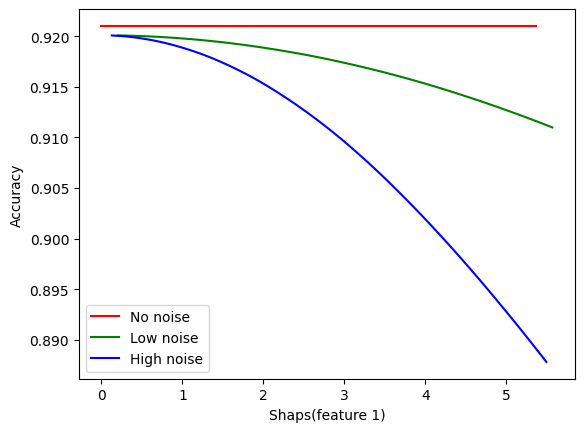

In [12]:
# Create scatter plots with different colors
plt.plot(shaps1_2, accs1, color='red', label='No noise')
plt.plot(shaps2_1, accs2, color='green', label='Low noise')
plt.plot(shaps3_1, accs3, color='blue', label='High noise')

# Add labels and legend
plt.xlabel('Shaps(feature 1)')
plt.ylabel('Accuracy')
plt.legend()

# Display the plot
plt.show()